In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [6]:
bikes=pd.read_csv("Bike-Dataset.csv")

In [7]:
bikes

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [8]:
bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
bikes.tail()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [10]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
instant       731 non-null int64
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11)
memory usage: 85.8 KB


In [11]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


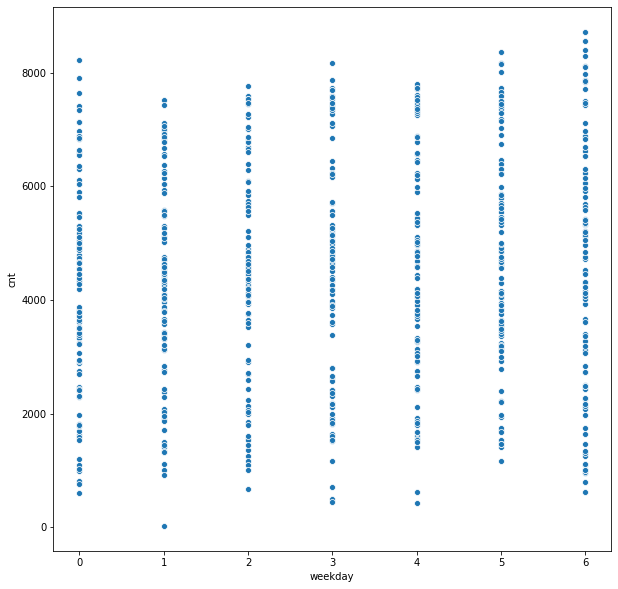

In [12]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='cnt',x='weekday',data=bikes)
plt.show()

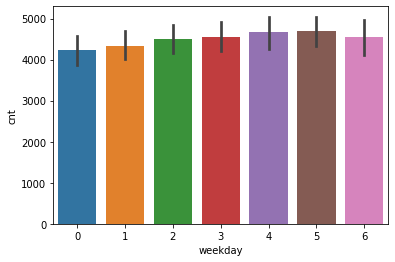

In [13]:
sns.barplot(x=bikes["weekday"],y=bikes["cnt"],data=bikes)
plt.show()

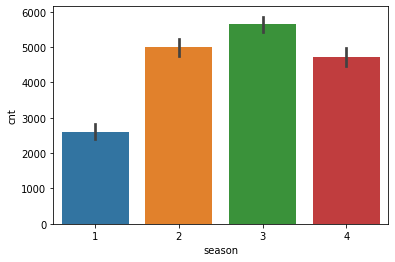

In [14]:
sns.barplot(x=bikes["season"],y=bikes["cnt"],data=bikes)
plt.show()

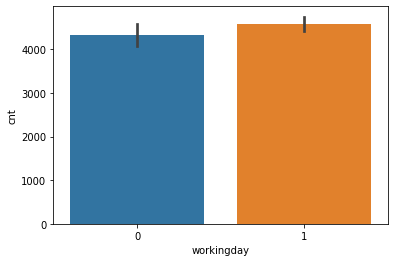

In [15]:
sns.barplot(x=bikes["workingday"],y=bikes["cnt"],data=bikes)
plt.show()

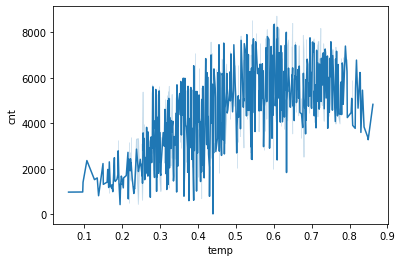

In [16]:
sns.lineplot(x=bikes["temp"],y=bikes["cnt"],data=bikes)
plt.show()

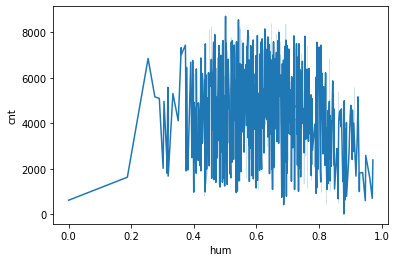

In [17]:
sns.lineplot(x=bikes["hum"],y=bikes["cnt"],data=bikes)
plt.show()

In [18]:
bikes.skew()

instant       0.000000
season       -0.000384
yr           -0.002742
mnth         -0.008149
holiday       5.654224
weekday       0.002742
workingday   -0.793147
weathersit    0.957385
temp         -0.054521
atemp        -0.131088
hum          -0.069783
windspeed     0.677345
casual        1.266454
registered    0.043659
cnt          -0.047353
dtype: float64

In [19]:
import numpy as np
for col in bikes.columns:
    if bikes.skew().loc[col]>0.55:
        bikes[col]=np.log1p(bikes[col])

In [20]:
bikes.skew()

instant       0.000000
season       -0.000384
yr           -0.002742
mnth         -0.008149
holiday       5.654224
weekday       0.002742
workingday   -0.793147
weathersit    0.759529
temp         -0.054521
atemp        -0.131088
hum          -0.069783
windspeed     0.497220
casual       -0.915990
registered    0.043659
cnt          -0.047353
dtype: float64

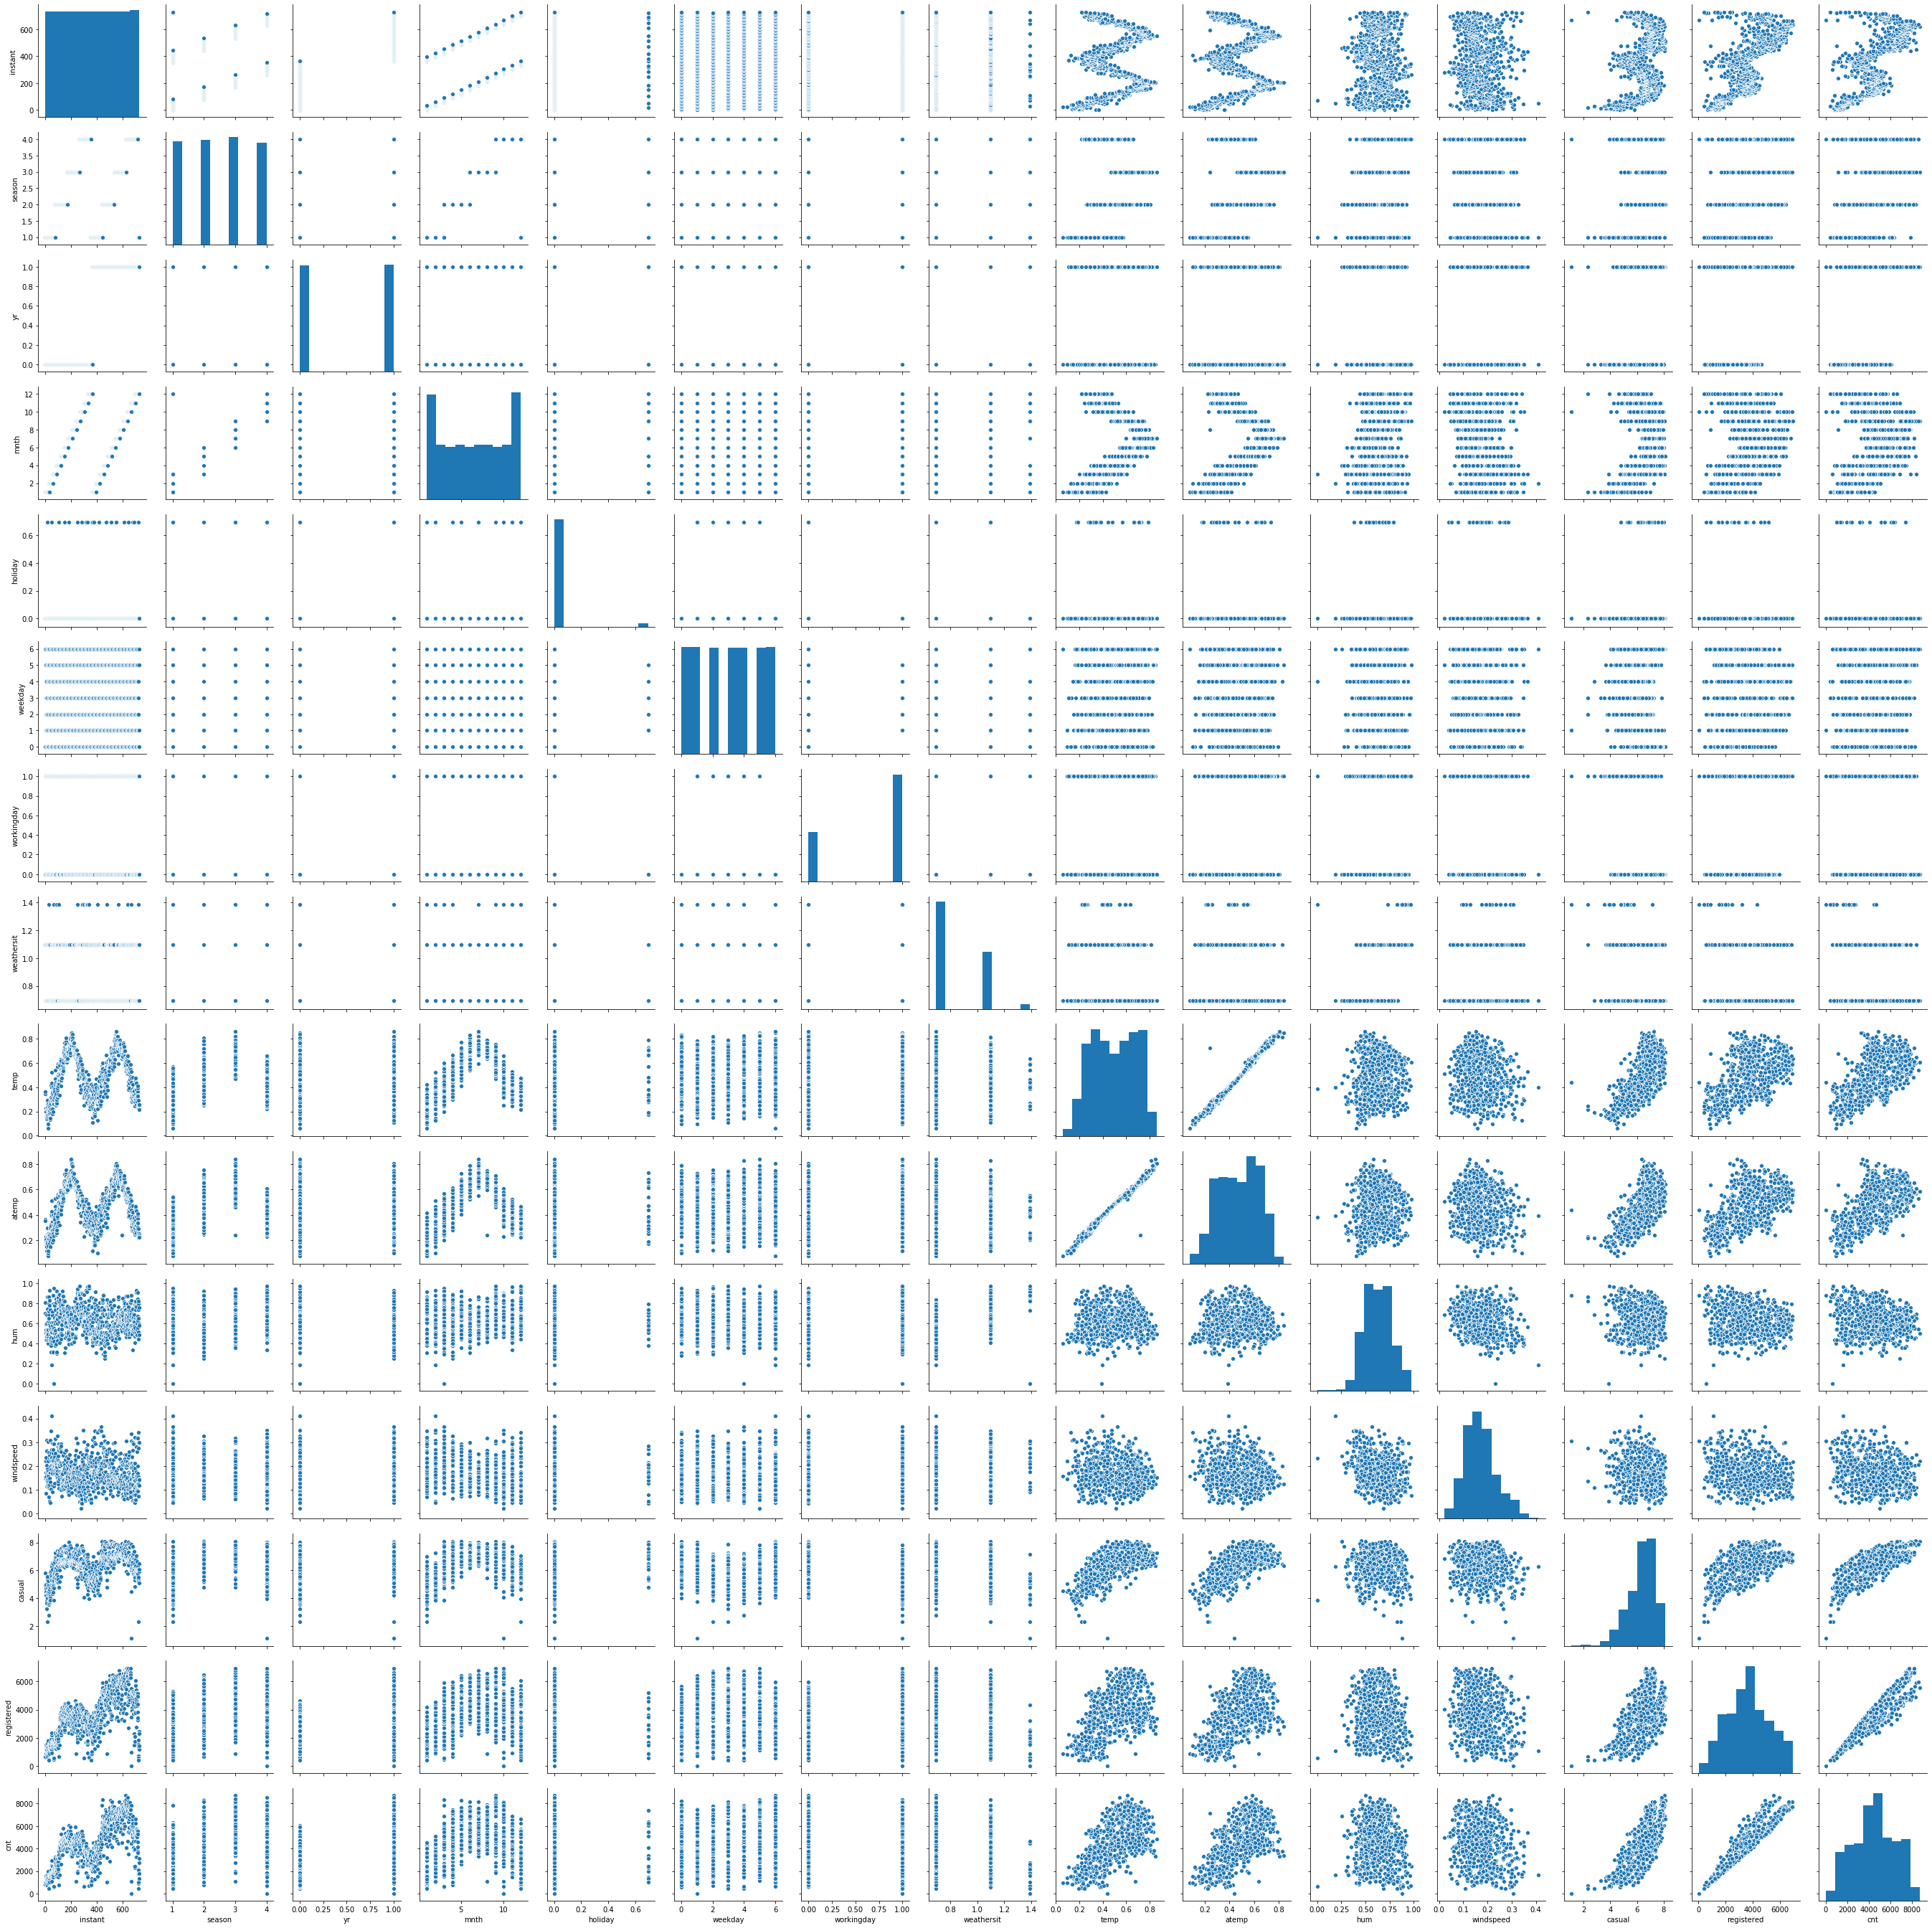

In [21]:
sns.pairplot(bikes)
plt.show()

In [22]:
from scipy.stats import zscore
z_score=abs(zscore(bikes))
print(bikes.shape)
bikes_final=bikes.loc[(z_score<3).all(axis=1)]
print(bikes_final.shape)

(731, 15)
(702, 15)


In [23]:
import numpy as np
df_x=bikes_final.drop(columns=["cnt"])
y=bikes_final[["cnt"]]

In [24]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x= sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [25]:
x.skew()

instant      -0.001418
season       -0.016148
yr           -0.005710
mnth         -0.008238
holiday       0.000000
weekday      -0.029602
workingday   -0.886648
weathersit    0.739757
temp         -0.073439
atemp        -0.148348
hum           0.064015
windspeed     0.464235
casual       -0.619793
registered    0.067874
dtype: float64

In [26]:
from sklearn import linear_model
max_r_score=0
for r_state in range(42,100):
    x_train, x_test,y_train,y_test = train_test_split(x,y,random_state = r_state,test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is: ",max_r_score)

max r2 score corresponding to  57  is:  0.984005786464677


In [27]:
from sklearn.model_selection  import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y, cv=5,scoring="r2").mean()

0.8997966137968545

In [28]:
x_train, x_test,y_train,y_test = train_test_split(x,y,random_state = 50,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict((x_test))

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print(("r2 score is: ",r2_score(y_test,y_pred)))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

('r2 score is: ', 0.9694366650827907)
RMSE is : 329.1355580146296


In [30]:
from sklearn.externals import joblib
joblib.dump(lr, "lr_bikeshare.pk1")

['lr_bikeshare.pk1']